In [1]:
# we use pandas for data preprocessing
import pandas as pd
import numpy as np


# plot data
import matplotlib.pyplot as plt
import seaborn as sns

# we need split API from sklearn to split the data set into train/test
from sklearn.model_selection import train_test_split

# we need to Load libraries and use Tree model
from sklearn.tree import DecisionTreeClassifier

# we also need scikit-learn metrics module for accuracy calculation
from sklearn import metrics        

In [54]:
# load in the transfer fee data into dataframe
# file_path = C:\Users\tycho\Downloads
df = pd.read_csv(r'C:\Users\tycho\Downloads\final_data.csv')
transfer = df[['current_value', 'highest_value', 'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award']]
# first 5 rows
# display(transfer.head())

# print("Dataset shape: ",transfer.shape)
# print("\nData Types:\n", transfer.dtypes)
# missing_values = transfer.isnull().sum()
# print("\nMissing values:\n", missing_values)
print("\nDescriptive Statistics:\n", transfer.describe())


Descriptive Statistics:
        current_value  highest_value        height           age    appearance  \
count   1.075400e+04   1.075400e+04  10754.000000  10754.000000  10754.000000   
mean    3.622971e+06   6.152606e+06    181.240353     26.041903     36.407011   
std     9.095410e+06   1.338988e+07      6.969818      4.777629     26.526541   
min     0.000000e+00   0.000000e+00    156.000000     15.000000      0.000000   
25%     3.000000e+05   4.500000e+05    176.000000     22.000000     12.000000   
50%     8.000000e+05   1.500000e+06    181.240353     26.000000     35.000000   
75%     3.000000e+06   5.000000e+06    186.000000     29.000000     59.000000   
max     1.800000e+08   2.000000e+08    206.000000     43.000000    107.000000   

              goals       assists  yellow cards  second yellow cards  \
count  10754.000000  10754.000000  10754.000000         10754.000000   
mean       0.125554      0.086978      0.189757             0.004666   
std        0.235585      0.1

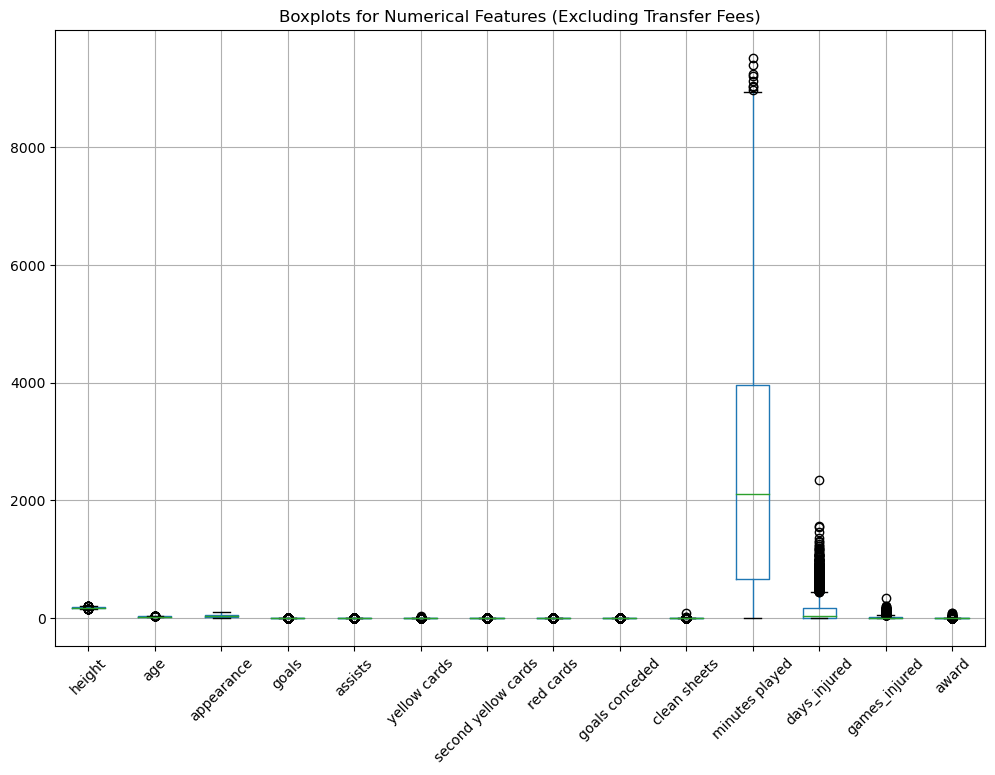

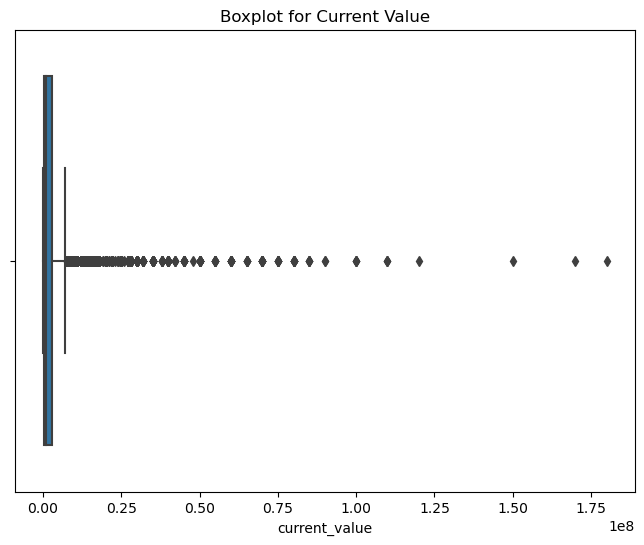

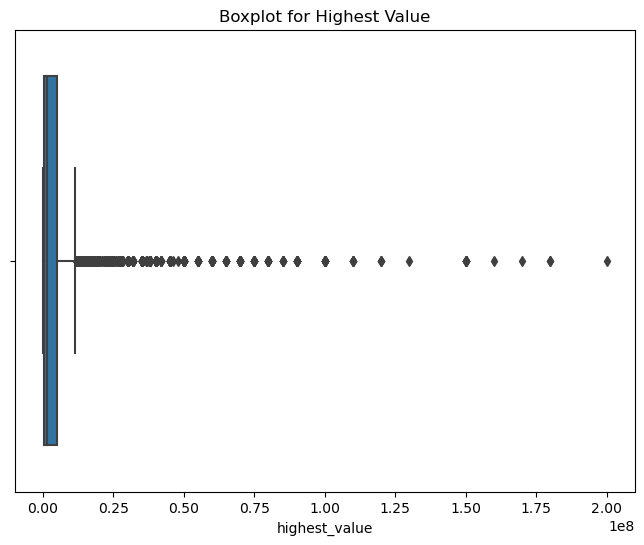

In [41]:
transfer_fee_columns = ['current_value', 'highest_value']
other_columns = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award']

# Boxplots for other columns
plt.figure(figsize=(12, 8))
transfer[other_columns].boxplot()
plt.title("Boxplots for Numerical Features (Excluding Transfer Fees)")
plt.xticks(rotation=45)
plt.show()

# Boxplot for current_value
plt.figure(figsize=(8, 6))
sns.boxplot(data=transfer, x='current_value')
plt.title("Boxplot for Current Value")
plt.show()

# Boxplot for highest_value
plt.figure(figsize=(8, 6))
sns.boxplot(data=transfer, x='highest_value')
plt.title("Boxplot for Highest Value")
plt.show()

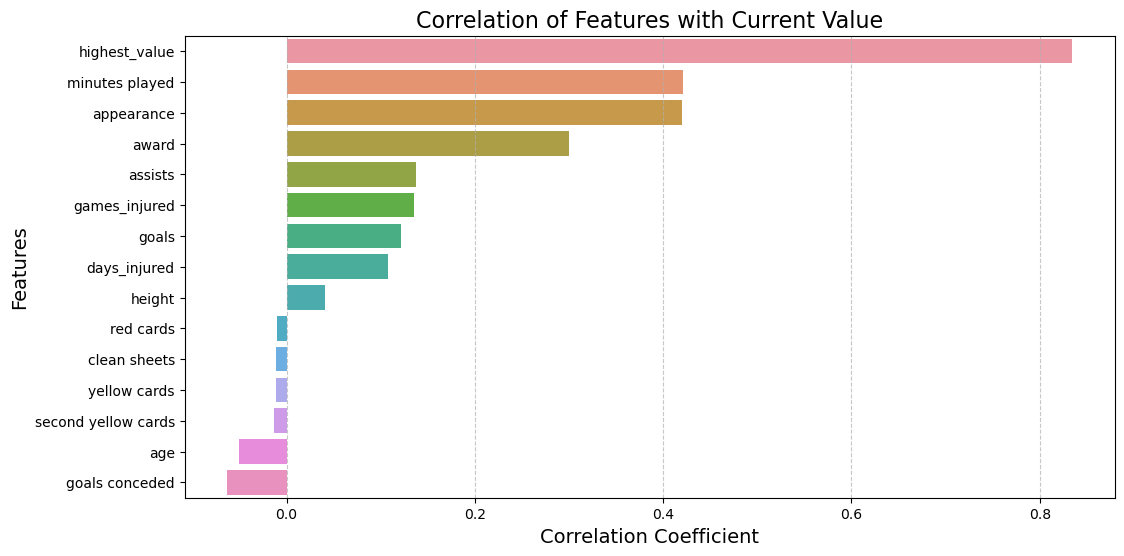

In [56]:
# Compute correlations with the target variable
correlations = transfer.corr()['current_value'].sort_values(ascending=False)

# Drop the correlation of the target variable with itself (1.0)
correlations = correlations.drop('current_value')

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)

# Add labels and title
plt.title('Correlation of Features with Current Value', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Display gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



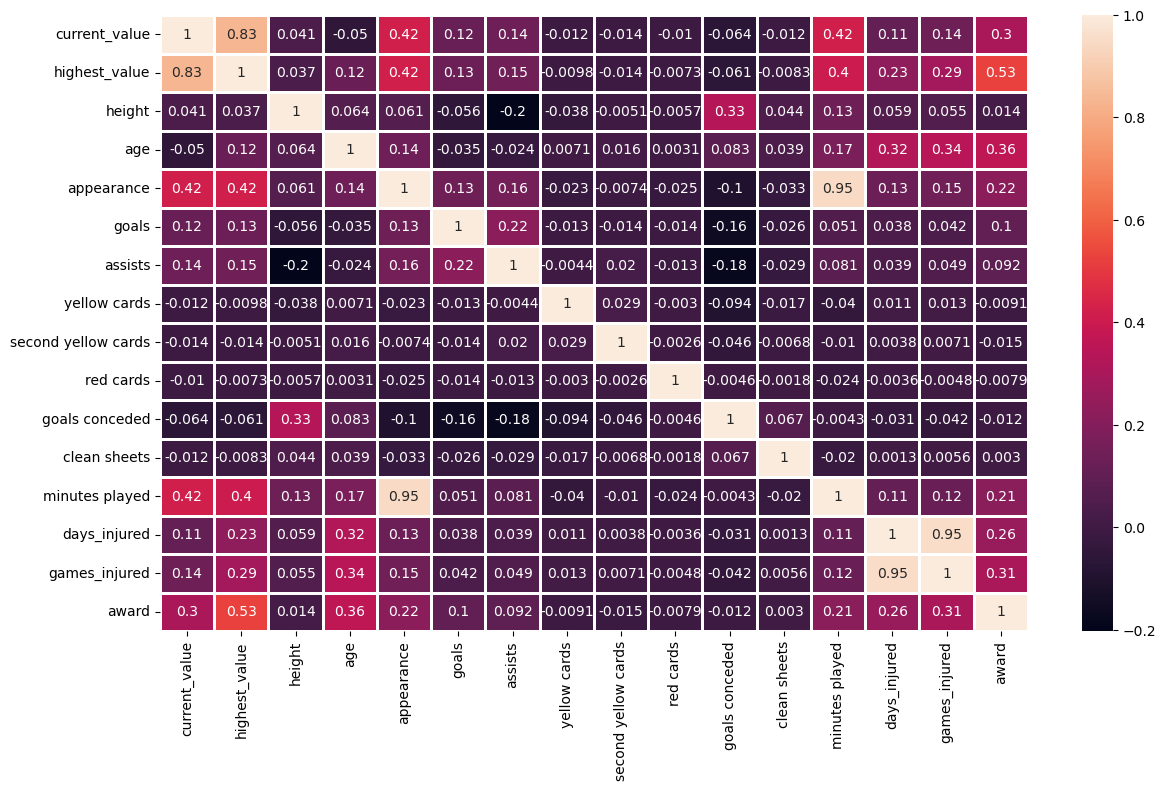

In [57]:
# use a bigger size
plt.figure(figsize=(14, 8))

# correlation heatmap
sns.heatmap(transfer.corr(), annot=True, linewidth =1)

plt.show() 